<a href="https://colab.research.google.com/github/SajalGarg035/machine-learning-data-science/blob/main/CGPA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA VISUALISATION AND ANALYSIS**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

###IMPORTING THE DATASET

In [ ]:
data = pd.read_csv( 'train.csv', index_col='ID')

In [ ]:
datas = pd.read_csv( 'test.csv',index_col='ID')

###**data analysis**

In [ ]:
data.head()

,College,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,C1,CGPA
ID,,,,,,,,,,,,,,,,,,,,,
1,IIITA,M,17,R,LE3,T,2,1,at_home,other,...,yes,3,3,2,2,2,5,8,8,4.656085
2,IIITA,M,17,U,GT3,T,4,3,other,other,...,yes,5,2,3,1,1,2,4,11,6.666667
3,IIITA,F,17,U,GT3,T,4,2,other,other,...,no,4,3,3,1,1,3,0,16,8.465608
4,IIITA,F,17,R,LE3,T,1,1,at_home,other,...,no,4,3,3,1,3,5,4,15,7.883598
5,IIITA,M,20,U,GT3,A,3,2,services,other,...,no,5,5,3,1,1,5,0,14,7.883598


In [ ]:
datas.head()

,College,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,C1
ID,,,,,,,,,,,,,,,,,,,,,
1,IIITA,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
2,IIITA,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
3,IIITA,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7
4,IIITA,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
5,IIITA,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,6


In [ ]:
print( data.shape )
print( datas.shape )
# CHECKING FOR NO. OF COLUMNS AND ROWS IN THE DATASET

(651, 32)
(397, 31)


In [ ]:
null_values = data.isnull().sum()
print( null_values )
#CHECKING FOR THE NULL VALUES WHETHER TO APPLY simpleimputer to replace the dataset from the column or delete it if it is insufficient

College       130
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
C1              0
CGPA            0
dtype: int64


In [ ]:
null_values = datas.isnull().sum()
print( null_values )

College       0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
C1            0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 1 to 651
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   College     521 non-null    object 
 1   sex         651 non-null    object 
 2   age         651 non-null    int64  
 3   address     651 non-null    object 
 4   famsize     651 non-null    object 
 5   Pstatus     651 non-null    object 
 6   Medu        651 non-null    int64  
 7   Fedu        651 non-null    int64  
 8   Mjob        651 non-null    object 
 9   Fjob        651 non-null    object 
 10  reason      651 non-null    object 
 11  guardian    651 non-null    object 
 12  traveltime  651 non-null    int64  
 13  studytime   651 non-null    int64  
 14  failures    651 non-null    int64  
 15  schoolsup   651 non-null    object 
 16  famsup      651 non-null    object 
 17  paid        651 non-null    object 
 18  activities  651 non-null    object 
 19  nursery     651 non-null    o

In [ ]:
df = pd.DataFrame( data )
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values of {column}: {unique_values}")


#AS THE DATASET COLLEGE HAS ONE UNIQUE VALUE SO WE DELETED IT INSTEAD OF TAKING CARE OF MISSING DATA

Unique values of College: ['IIITA' nan]
Unique values of sex: ['M' 'F']
Unique values of age: [17 20 16 18 15 19 21 22]
Unique values of address: ['R' 'U']
Unique values of famsize: ['LE3' 'GT3']
Unique values of Pstatus: ['T' 'A']
Unique values of Medu: [2 4 1 3 0]
Unique values of Fedu: [1 3 2 0 4]
Unique values of Mjob: ['at_home' 'other' 'services' 'teacher' 'health']
Unique values of Fjob: ['other' 'at_home' 'services' 'health' 'teacher']
Unique values of reason: ['course' 'reputation' 'other' 'home']
Unique values of guardian: ['mother' 'other' 'father']
Unique values of traveltime: [2 1 4 3]
Unique values of studytime: [1 2 3 4]
Unique values of failures: [1 0 2 3]
Unique values of schoolsup: ['no' 'yes']
Unique values of famsup: ['no' 'yes']
Unique values of paid: ['yes' 'no']
Unique values of activities: ['yes' 'no']
Unique values of nursery: ['yes' 'no']
Unique values of higher: ['no' 'yes']
Unique values of internet: ['yes' 'no']
Unique values of romantic: ['yes' 'no']
Uniqu

In [ ]:
df = pd.DataFrame( datas )

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values of {column}: {unique_values}")

Unique values of College: ['IIITA']
Unique values of sex: ['F' 'M']
Unique values of age: [18 17 15 16 19 22 20 21]
Unique values of address: ['U' 'R']
Unique values of famsize: ['GT3' 'LE3']
Unique values of Pstatus: ['A' 'T']
Unique values of Medu: [4 1 3 2 0]
Unique values of Fedu: [4 1 2 3 0]
Unique values of Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Unique values of Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Unique values of reason: ['course' 'other' 'home' 'reputation']
Unique values of guardian: ['mother' 'father' 'other']
Unique values of traveltime: [2 1 3 4]
Unique values of studytime: [2 3 1 4]
Unique values of failures: [0 3 2 1]
Unique values of schoolsup: ['yes' 'no']
Unique values of famsup: ['no' 'yes']
Unique values of paid: ['no' 'yes']
Unique values of activities: ['no' 'yes']
Unique values of nursery: ['yes' 'no']
Unique values of higher: ['yes' 'no']
Unique values of internet: ['no' 'yes']
Unique values of romantic: ['no' 'yes']
Unique va

In [ ]:
data.drop( columns=[ 'College' ] , inplace=True )
datas.drop( columns=[ 'College' ] , inplace=True )

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,C1,CGPA
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,16.745008,2.516129,2.308756,1.569892,1.930876,0.221198,3.930876,3.18126,3.187404,1.500768,2.276498,3.537634,3.654378,11.382488,6.253464
std,1.217609,1.134481,1.100308,0.747889,0.828241,0.592449,0.954253,1.04999,1.174824,0.923830,1.284362,1.445326,4.635853,2.777315,1.631730
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.211640
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,5.291005
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,6.243386
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,7.301587
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,10.000000


In [ ]:
x = data.corr()
#GETTING THE CORRELATION OF DIFFERENT COLUMNS WITH EACH OTHER USING THE FUNCTION .CORR()

<ipython-input-79-e2a8c936c012>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = data.corr()


In [ ]:
print(x[ 'CGPA' ].dtype)

float64


In [ ]:
x[ 'CGPA' ].sort_values(ascending=False)

CGPA          1.000000
C1            0.854654
studytime     0.254811
Medu          0.247344
Fedu          0.215887
famrel        0.065742
goout        -0.087950
health       -0.094526
absences     -0.101401
age          -0.115634
freetime     -0.120842
traveltime   -0.135116
Walc         -0.176038
Dalc         -0.205957
failures     -0.399241
Name: CGPA, dtype: float64

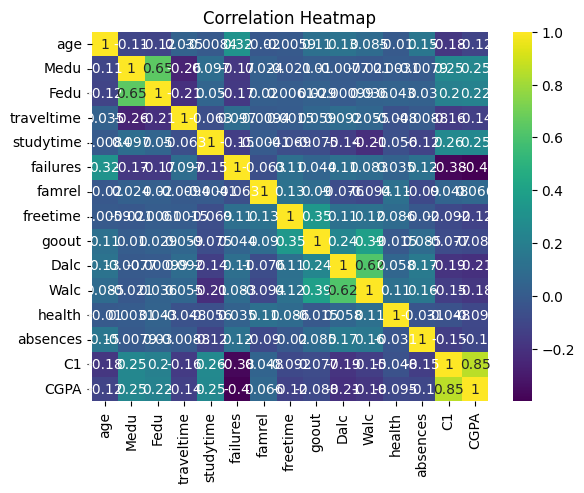

In [ ]:
import seaborn as sns
sns.heatmap(x , annot=True , cmap='viridis')
plt.title( "Correlation Heatmap" )
plt.show()

#correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset
#correlation graph is plotted using seaborn and we looked for relation of cgpa with other columns
#-1 or negative inversely prop
#1 or positive directly prop

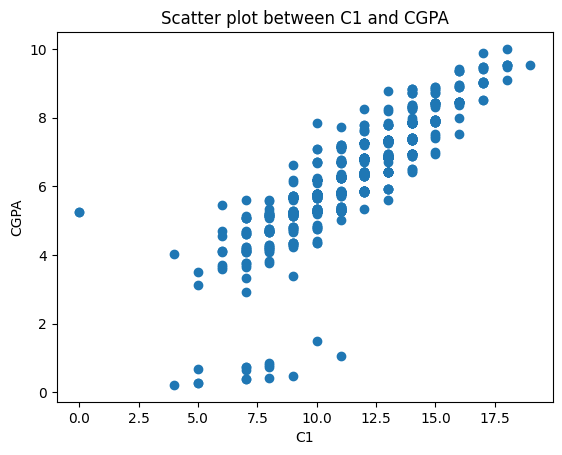

In [ ]:
plt.scatter( data['C1'] , data['CGPA'] )
plt.title( 'Scatter plot between C1 and CGPA')
plt.xlabel('C1')
plt.ylabel('CGPA')
plt.show()

<Axes: xlabel='age', ylabel='CGPA'>

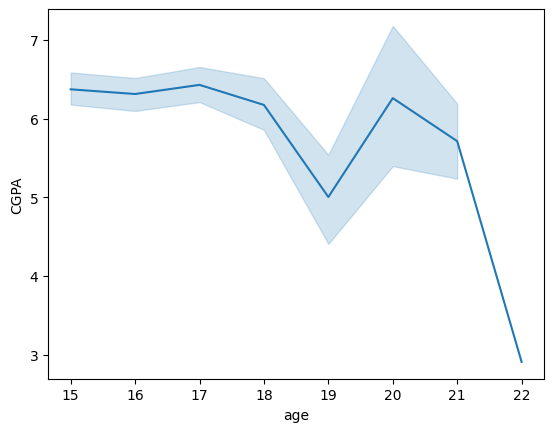

In [ ]:
sns.lineplot(x=data['age'],y=data['CGPA'])

#Almost every age has the same avg. No significe of age on cgpa. Drop age

<Axes: xlabel='address', ylabel='CGPA'>

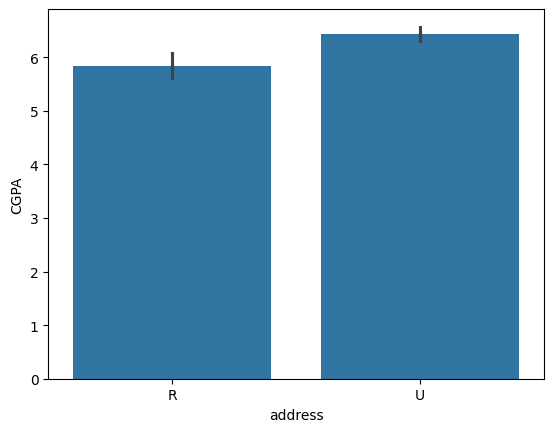

In [ ]:
sns.barplot(x=data['address'],y=data['CGPA'])

#R and U have different avg CG. Can apply ohe

<Axes: xlabel='Pstatus', ylabel='CGPA'>

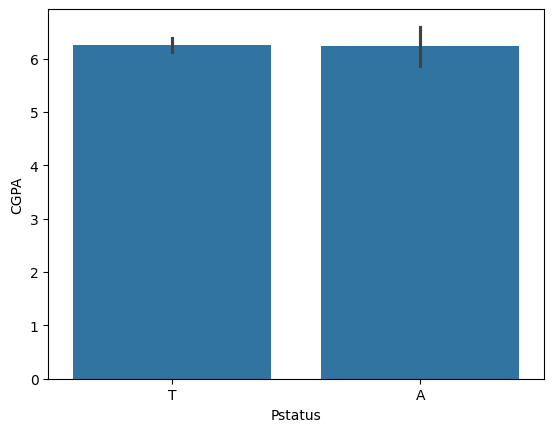

In [ ]:
sns.barplot(x=data['Pstatus'],y=data['CGPA'])

#No significance on CG. Drop Pststus

<Axes: xlabel='Mjob', ylabel='CGPA'>

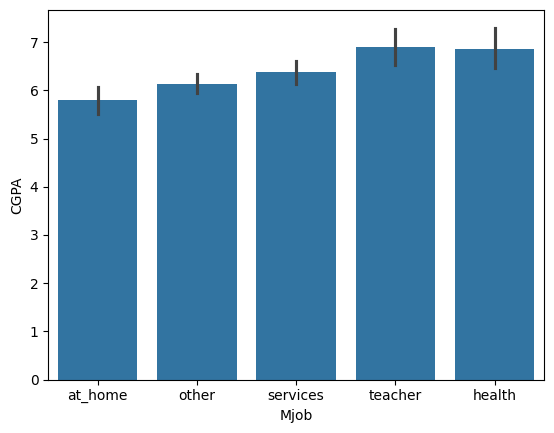

In [ ]:
sns.barplot(x=data['Mjob'],y=data['CGPA'])

#Avg of teacher and health is slightly higher but with the rest of jobs, the min and max values overlap.Drop Mjob

<Axes: xlabel='Fjob', ylabel='CGPA'>

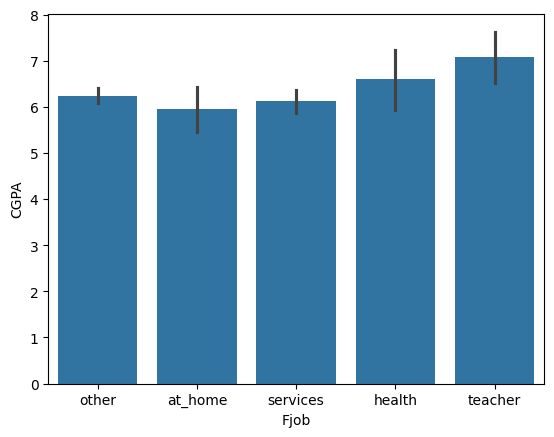

In [ ]:
sns.barplot(x=data['Fjob'],y=data['CGPA'])

#Avg of teacher is slightly higher but with the rest of jobs, the min and max values overlap.
#Other and Servies make 83% of data, uneven distribution .Drop Fjob

<Axes: xlabel='reason', ylabel='CGPA'>

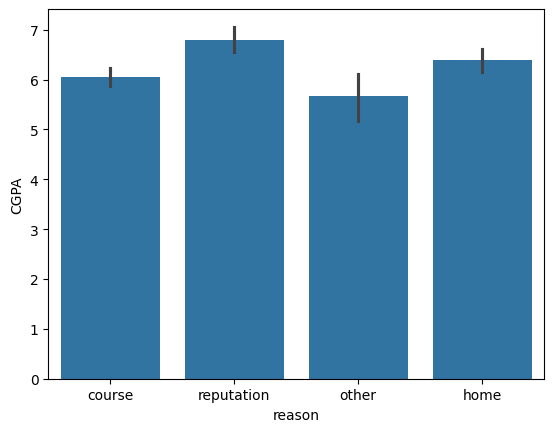

In [ ]:
sns.barplot(x=data['reason'],y=data['CGPA'])

#Every reason has a different avg and range. Apply ohe

<Axes: xlabel='guardian', ylabel='CGPA'>

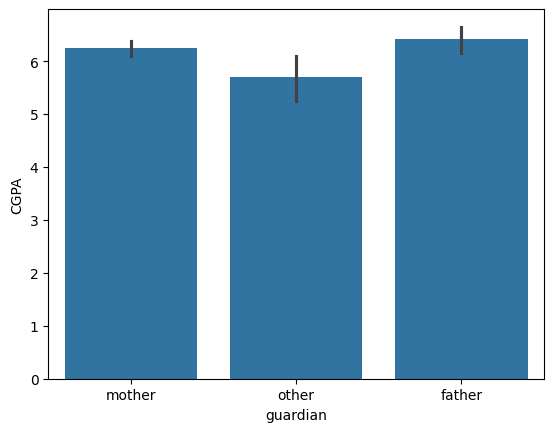

In [ ]:
sns.barplot(x=data['guardian'],y=data['CGPA'])
#Mother and father have same results. Converge them into a class called parents and apply ohe

In [ ]:
sns.barplot(x=data['famsize'],y=data['CGPA'])# No significant difference. Drop famsize

<Axes: xlabel='famsize', ylabel='CGPA'>

In [ ]:
sns.barplot(x=data['Pstatus'],y=data['CGPA'])#No difference observed in the graph. Drop Pstatus

In [ ]:
sns.barplot(x=data['schoolsup'],y=data['CGPA'])#No significant(very slight) change in the avg CG. drop schoolsup

In [ ]:
sns.barplot(x=data['famsup'],y=data['CGPA'])#No change in avg CG. Drop

In [ ]:
sns.barplot(x=data['paid'],y=data['CGPA'])
#Range of Yes is very high, and the range of no is almost within yes. Not reliable.Drop

In [ ]:
sns.barplot(x=data['activities'],y=data['CGPA'])# No change. Drop

In [ ]:
sns.barplot(x=data['nursery'],y=data['CGPA'])#No change observed. Drop

In [ ]:
sns.barplot(x=data['higher'],y=data['CGPA'])#Clear trend observed. Apply ohe

In [ ]:
sns.barplot(x=data['romantic'],y=data['CGPA'])#No significant change. drop

In [ ]:
sns.barplot(x=data['famrel'],y=data['CGPA'])#Avg is different but values overlap. Drop

In [ ]:
sns.barplot(x=data['Dalc'],y=data['CGPA'])#Values overlapping. Drop

In [ ]:
sns.barplot(x=data['Walc'],y=data['CGPA'])#1 and 2 have almost the same avg. The rest are overlapping. Drop

In [ ]:
sns.barplot(x=data['absences'],y=data['CGPA'])#There is no significance of absence in cg. Drop

In [ ]:
data.drop(columns=['age','Mjob','Pstatus','famsize','Fjob','absences','Walc','paid','Dalc','romantic','nursery','activities','schoolsup','famsup','famrel'], inplace=True)
datas.drop(columns=['age','Mjob','Pstatus','famsize','Fjob','absences','Walc','paid','Dalc','romantic','nursery','activities','schoolsup','famsup','famrel'], inplace=True)
#Dropping the columns in both train and test

In [ ]:
data.replace(to_replace=['mother','father'], value= 'parent', inplace=True)
datas.replace(to_replace=['mother','father'], value= 'parent', inplace=True)
#Changing the guardian column

In [ ]:
y=data.iloc[:, -1]

In [ ]:
X = data.iloc[:, :-1]

In [ ]:
# import pandas as pd
# X=pd.Dataframe(X)
# print(X)

###Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['sex','address','reason','guardian','higher','internet']),
],remainder='passthrough')

X=np.array(transformer.fit_transform(X))
datas=np.array(transformer.fit_transform(datas))
#Applying ONeHotEncoding

In [ ]:

X = pd.DataFrame(X)
X.info()

#REGRESSION MODEL ON THE DATASET

###GRADIENT BOOST REGRESSION (BEST RESULTS)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Regressor

gb_regressor = GradientBoostingRegressor()

# Fit the model to the training data

gb_regressor.fit(X,y)

# Make predictions on the testing data

predictions=gb_regressor.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

###APPLICATION OF POLYNOMIAL REGRESSION ON THE DATASET(GAVE ACCURACY OF 0.75 ON TRAINING DATASET)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 1  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)

# Transforming features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model.predict(X_test_poly)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
print("Shape of X_test_poly:", X_test_poly.shape)


###TRIED XGBOOST REGRESSION ALSO

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# type(X_train)
# X_train.dtypes
# # type(y_train)
# # y_train.dtypes

In [ ]:
# xgb_regressor = XGBRegressor()

# # Step 5: Fit the model to the training data
# xgb_regressor.fit(X_train, y_train)

# # Step 6: Make predictions on the testing data
# predictions = xgb_regressor.predict(X_test)
# r2 = r2_score(y_test, predictions)
# print("R-squared Score:", r2)
# # Step 7: Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)

###LINEAR REGRESSION APPLICATION ON THE DATASET

In [ ]:
#  import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# type(X_train)
# X_train.dtypes
# # # Create a linear regression model
# # model = LinearRegression()
# # # Fit the model to the training data
# # model.fit(X_train, y_train)
# # # Make predictions on the testing data
# # predictions = model.predict(X_test)
# # # Calculate R-squared score
# # r2 = r2_score(y_test, y_pred)
# print("R-squared Score:", r2)

In [ ]:

X_te= poly_features.transform(datas)

###FINAL PREDICTIONS USING GRADIENT BOOST REGRESSION

In [ ]:
gb_regressor.predict(datas)

###FINAL PREDICTIONS USING POLYNOMIAL REGRESSION

In [ ]:
model.predict(X_te)

###DECISION TREE REGRESSION (Max_Score =0.71)###





In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2,random_state=42)
#Doing train test split on train dataset to find the best hyperparameters

In [ ]:
param_grid = {
    'max_depth':[2,3,4,6,8,10,15,20,25,30,35,40,None],
    'criterion':['absolute_error','squared_error'],
    'max_features':[0,0.1,0.15,0.2,0.25,0.35,0.4,0.5,0.6,0.65,0.75,0.8,0.9,1.0],
    'min_samples_split':[0.1,0.2,0.25,0.35,0.4,0.5,0.6,0.75,0.8,0.9,1.0]

}
#Making a parmeter grid for gridsearch

In [ ]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [ ]:
reg.fit(X_train_dt,y_train_dt)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1430 fits failed out of a total of 20020.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1430 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in 

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [2, 3, 4, 6, 8, 10, 15, 20, 25, 30, 35,
                                       40, None],
                         'max_features': [0, 0.1, 0.15, 0.2, 0.25, 0.35, 0.4,
                                          0.5, 0.6, 0.65, 0.75, 0.8, 0.9, 1.0],
                         'min_samples_split': [0.1, 0.2, 0.25, 0.35, 0.4, 0.5,
                                               0.6, 0.75, 0.8, 0.9, 1.0]})

In [ ]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.2}

In [ ]:
reg.best_score_

0.7294064860772858

In [ ]:
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, max_features=1, min_samples_split= 0.2, splitter='random')

In [ ]:
rt.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_features=1, min_samples_split=0.2,
                      splitter='random')

Final Prediction of Decision tree

In [ ]:
rt.predict(datas)
#Not the best hyperparameters for the test dataset. We obtained the highest r2 score on test dataset by changing the parameters

array([6.46980811, 6.46980811, 4.60971405, 6.46980811, 6.46980811,
       7.00190476, 6.46980811, 6.46980811, 6.46980811, 5.64484127,
       7.00190476, 7.00190476, 6.46980811, 6.46980811, 6.46980811,
       6.46980811, 7.00190476, 7.00190476, 4.60971405, 6.46980811,
       5.64484127, 6.46980811, 5.64484127, 7.00190476, 6.46980811,
       4.60971405, 6.46980811, 6.46980811, 6.46980811, 6.46980811,
       6.46980811, 5.64484127, 6.46980811, 6.46980811, 6.46980811,
       5.64484127, 6.46980811, 7.00190476, 6.46980811, 5.64484127,
       4.60971405, 6.46980811, 6.46980811, 5.64484127, 4.60971405,
       6.46980811, 6.46980811, 7.00190476, 6.46980811, 4.60971405,
       6.46980811, 6.46980811, 4.60971405, 6.46980811, 6.46980811,
       6.46980811, 7.00190476, 7.00190476, 6.46980811, 6.46980811,
       6.46980811, 6.46980811, 7.00190476, 6.46980811, 7.00190476,
       6.46980811, 7.00190476, 6.46980811, 7.00190476, 7.00190476,
       7.00190476, 6.46980811, 4.60971405, 7.00190476, 6.46980

###SVM###

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVR

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)

In [ ]:
grid.fit(X_train_svm,y_train_svm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid.best_params_
#Getting the best parameters over X-test

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.7397079937810049

In [ ]:
model=SVR(C=10,verbose=True,gamma=0.01)
#Applying parameters over data

In [ ]:
model.fit(X,y)

[LibSVM]

SVR(C=10, gamma=0.01, verbose=True)

In [ ]:
model.predict(datas)

array([4.34554216, 3.76668646, 4.18974251, 8.27320967, 3.68873866,
       8.38697423, 6.46109379, 4.99804483, 8.81099128, 7.88980844,
       5.80320944, 5.68594726, 7.72855511, 5.72061893, 7.85757905,
       7.57594275, 7.22502463, 4.86247628, 3.29255921, 4.71713647,
       7.0367083 , 6.56724401, 8.49474169, 6.90922357, 5.4434918 ,
       3.86613628, 6.67432266, 8.08769629, 6.14816059, 5.43746389,
       5.04226291, 9.30234916, 9.58784445, 4.7838611 , 6.45718104,
       4.95490425, 8.192819  , 8.38864452, 6.60558138, 7.73812638,
       4.46666047, 6.79643998, 9.95189294, 4.90723123, 5.48214454,
       4.53909133, 6.23434287, 9.90950898, 8.13613371, 4.12188397,
       6.57710751, 5.93385904, 5.19861889, 4.68976815, 5.61513894,
       4.56313152, 7.6128242 , 7.72861078, 5.23071699, 8.27087286,
       5.49578464, 5.48502961, 4.92471908, 5.55830484, 5.74308953,
       8.51281541, 7.15969844, 3.97011956, 4.65771518, 8.98333619,
       7.08243715, 5.62601192, 4.3875251 , 6.6518017 , 6.12802